# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [2]:
from scipy.stats import binom, norm, uniform

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


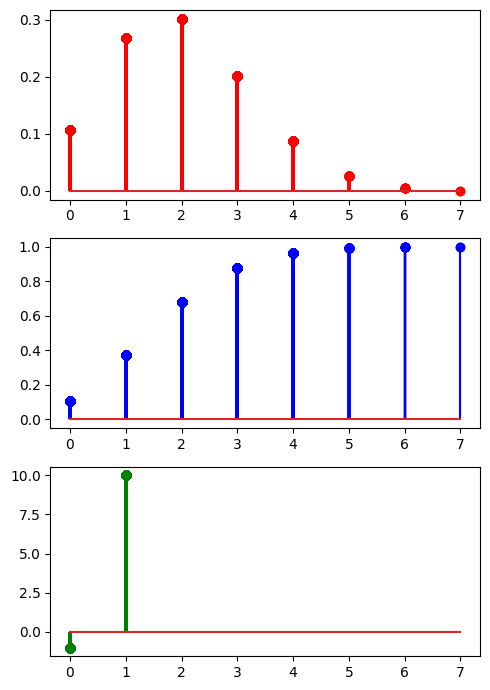

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [5]:
def dnormal(x, mean=0, std=1):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = norm.pdf(x, loc=mean, scale=std)

    return result


def pnormal(q, mean=0, std=1):
    """
    Calcula el acumedialado de la distribución binomial.
    """
    result = norm.cdf(q, loc=mean, scale=std)

    return result


def qnormal(p, mean=0, std=1):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = norm.ppf(p, loc=mean, scale=std)

    return result


def rnormal(n, mean=0, std=1):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = norm.rvs(loc=mean, scale=std, size=n)

    return result

In [6]:
n = 10
p = 0.2


media= n * p
desviacion = np.sqrt(n * p * (1 - p))


print(f"Probability that a Normal({media}, {desviacion}) takes the value 2: {dnormal(2, mean=media, std=desviacion)}")
print(f"Probability that a Normal({media}, {desviacion}) will take a value less than 2: {pnormal(2, mean=media, std=desviacion)}")
print(f"Which value of a Normal({media}, {desviacion}) has a cumedialative probability of 0.9? {qnormal(0.9, mean=media, std=desviacion)}")
print(f"Generate 2000 random values from a Normal({media}, {desviacion}) distribution: {rnormal(2000, mean=media, std=desviacion)}")


Probability that a Normal(2.0, 1.2649110640673518) takes the value 2: 0.31539156525252005
Probability that a Normal(2.0, 1.2649110640673518) will take a value less than 2: 0.5
Which value of a Normal(2.0, 1.2649110640673518) has a cumedialative probability of 0.9? 3.621048754430201
Generate 2000 random values from a Normal(2.0, 1.2649110640673518) distribution: [0.88943011 0.95406989 1.71352434 ... 1.95468383 1.32775726 0.01679727]


ValueError: x and y must have same first dimension, but have shapes (2000,) and (1,)

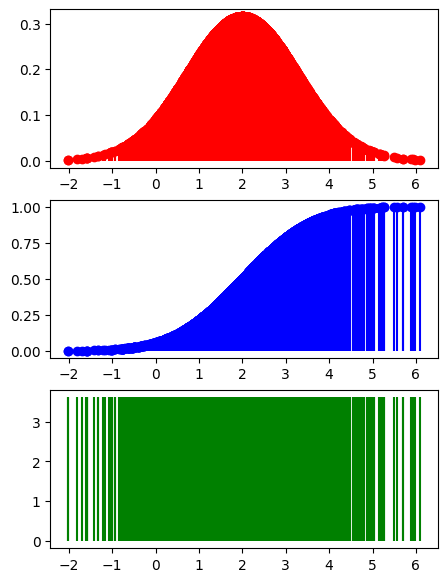

In [7]:
data_normal = rnormal(2000, mean=media, std=desviacion)
pmf_normal = dnormal(data_normal, mean=media, std=desviacion)  
cdf_normal = pnormal(data_normal, mean=media, std=desviacion)
ppf_normal = qnormal(0.9, mean=media, std=desviacion)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))
axis[0].stem(data_normal, pmf_normal, 'r-', basefmt=" ")
axis[1].stem(data_normal, cdf_normal, 'b-', basefmt=" ")
axis[2].stem(data_normal, ppf_normal, 'g-', basefmt=" ")

plt.tight_layout()
plt.show()
#plt.savefig('./Normal.png')


In [8]:
def duniform(x, low=0, high=1):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = uniform.pdf(x,  loc=low, scale=high-low)

    return result


def puniform(q, low=0, high=1):
    """
    Calcula el acumedialado de la distribución binomial.
    """
    result = uniform.cdf(q, loc=low, scale=high-low)

    return result


def quniform(p, low=0, high=1):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = uniform.ppf(p, loc=low, scale=high-low)

    return result


def runiform(n, low=0, high=1):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = uniform.rvs(loc=low, scale=high, size=n)

    return result


In [9]:
low = 0
high = n 


print(f"Probability that a Uniform({low}, {high}) takes the value 2: {duniform(2, low=low, high=high)}")
print(f"Probability that a Uniform({low}, {high}) will take a value less than 2: {puniform(2, low=low, high=high)}")
print(f"Which value of a Uniform({low}, {high}) has a cumedialative probability of 0.9? {quniform(0.9, low=low, high=high)}")
print(f"Generate 2000 random values from a Uniform({low}, {high}) distribution: {runiform(2000, low=low, high=high)}")

Probability that a Uniform(0, 10) takes the value 2: 0.1
Probability that a Uniform(0, 10) will take a value less than 2: 0.2
Which value of a Uniform(0, 10) has a cumedialative probability of 0.9? 9.0
Generate 2000 random values from a Uniform(0, 10) distribution: [9.32648101 3.83058806 7.29521422 ... 3.16292349 9.76070586 2.56831575]


ValueError: x and y must have same first dimension, but have shapes (2000,) and (1,)

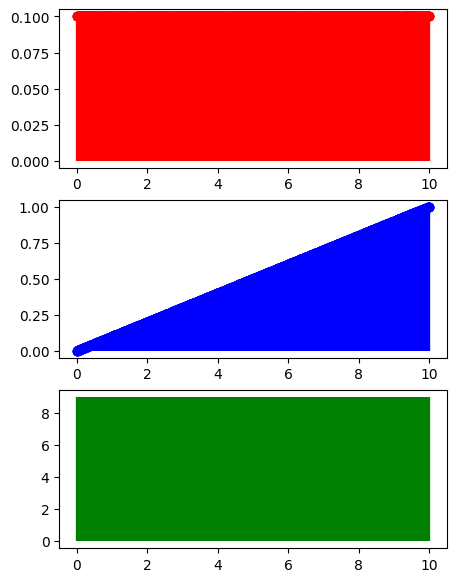

In [10]:
data_uniform = runiform(2000, low=low, high=high)
pmf_uniform = duniform(data_uniform, low=low, high=high)
cdf_uniform = puniform(data_uniform, low=low, high=high)
ppf_uniform = quniform(0.9, low=low, high=high)

fig, axis = plt.subplots(3, 1, figsize=(5, 7))
axis[0].stem(data_uniform, pmf_uniform, 'r-', basefmt=" ")
axis[1].stem(data_uniform, cdf_uniform, 'b-', basefmt=" ")
axis[2].stem(data_uniform, ppf_uniform, 'g-', basefmt=" ")

plt.tight_layout()
plt.show()
#plt.savefig('./Uniforme.png')